# wine-reviews (winemag-data-130k-v2)
## 1. Data Visualization and Data Summary
### 1.1 data summary

In [1]:
import pandas as pd  # data processing, csv file I/O
import numpy as np
import matplotlib.pyplot as plt
import time

# timekeeping
timekeeping = time.time()

# load csv file
data = pd.read_csv('../wine-reviews/winemag-data-130k-v2.csv')

##### Descriptors of the raw datase

In [2]:
data.info()
data_shape = data.shape
print(data_shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


##### Find indexes of nominal and numerical data
remove the redundent column of row number

In [3]:
# Nominal index
nominal_index = ['country','designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
# Numerical index
numerical_index = ['points', 'price']

# Get frequency of each arrtibute
data_frequency = {key: data[key].value_counts() for key in data.columns}

#### Nominal data summary
- Show top 5 frequency values
- Bar chart visualization of nominal data frequency (Top 50)

Top 5 frequency of country:
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 


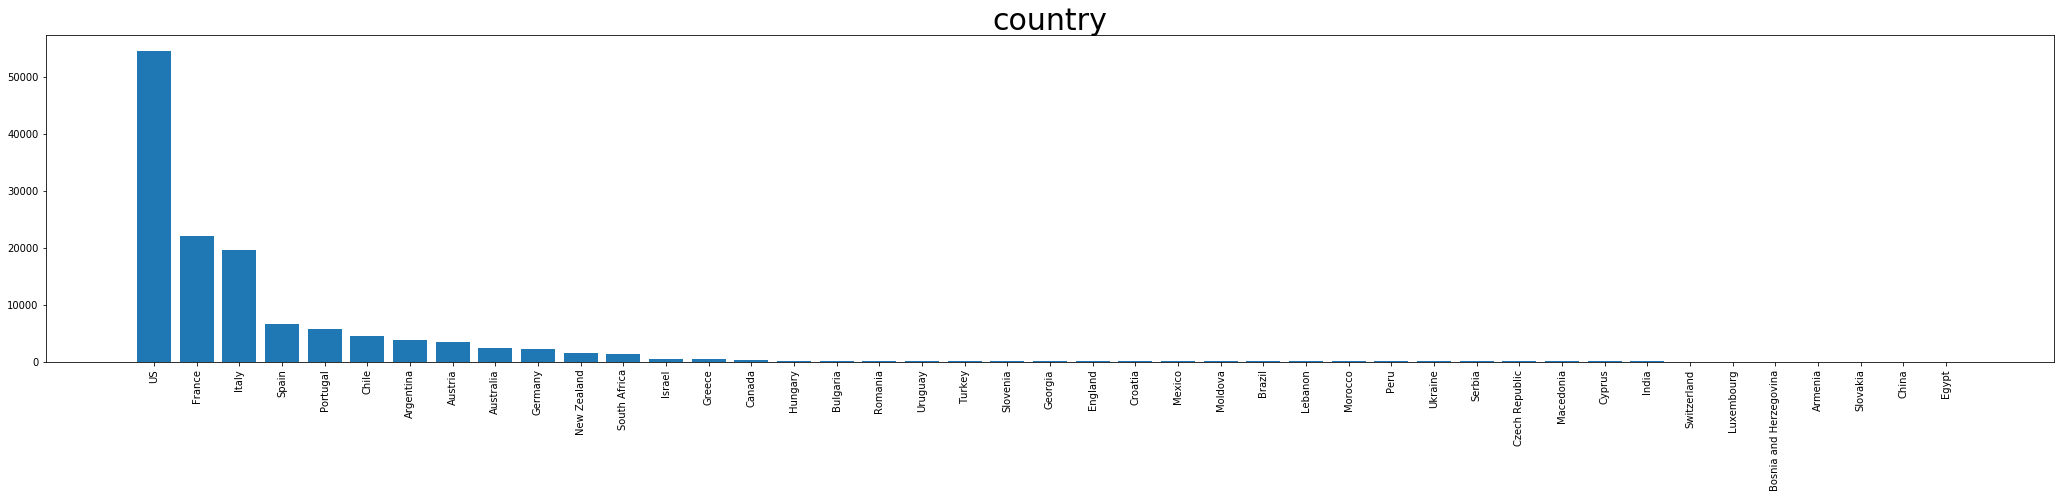

Top 5 frequency of designation:
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 


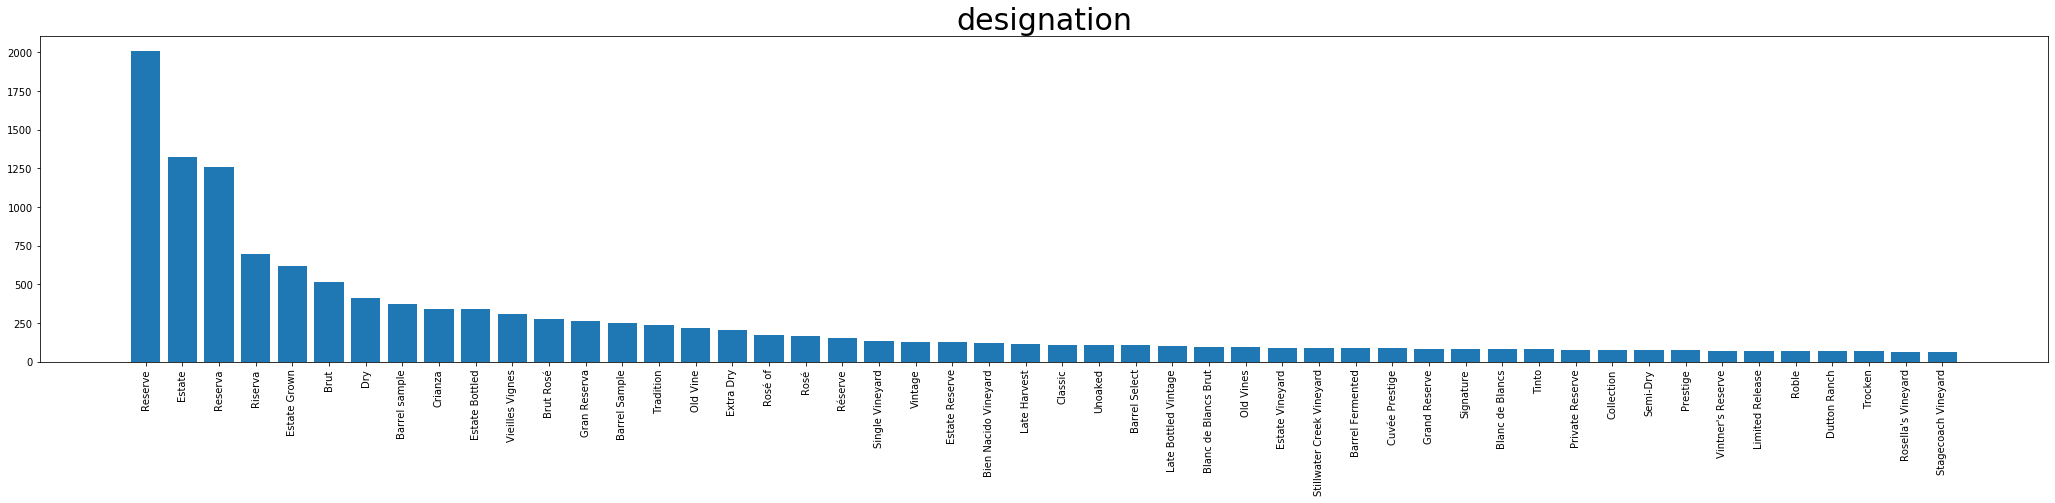

Top 5 frequency of province:
California (58.37%) | Washington (13.91%) | Bordeaux (9.57%) | Tuscany (9.50%) | Oregon (8.65%) | 


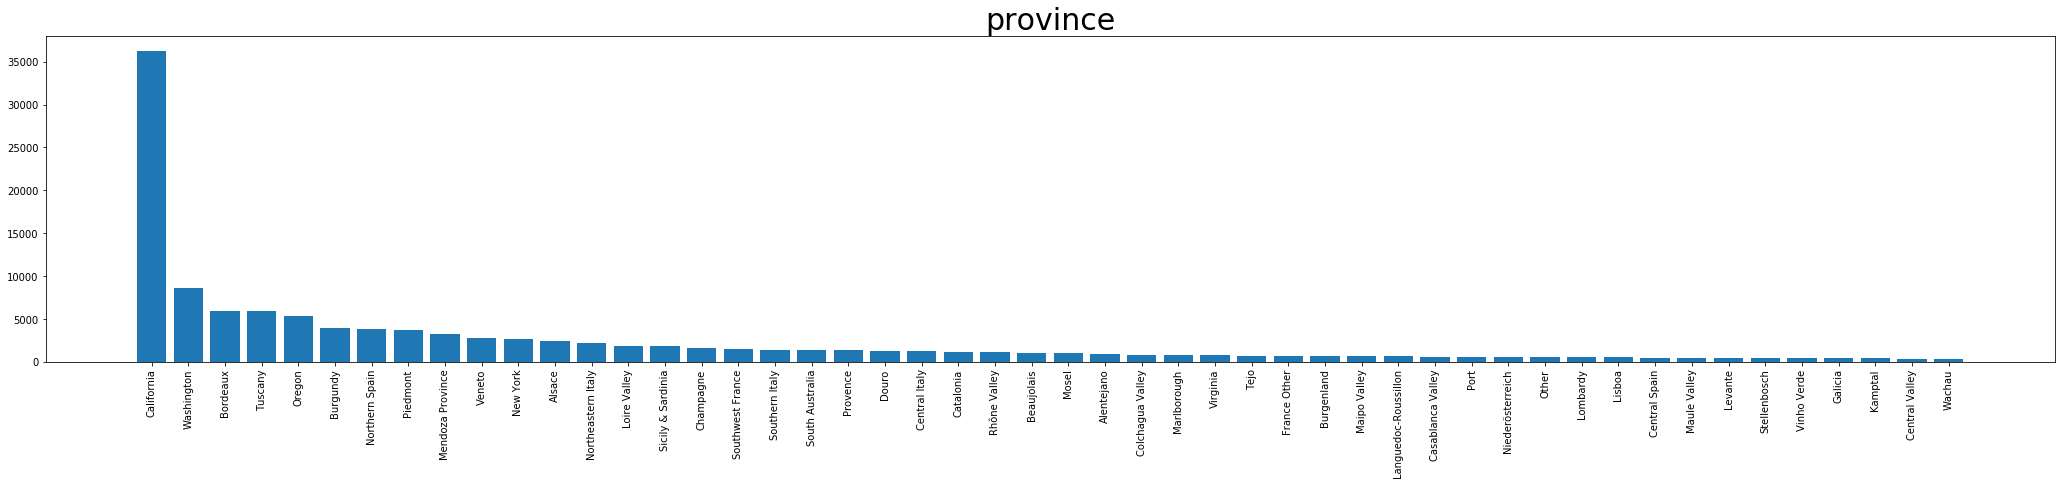

Top 5 frequency of region_1:
Napa Valley (26.87%) | Columbia Valley (WA) (24.73%) | Russian River Valley (18.54%) | California (15.77%) | Paso Robles (14.09%) | 


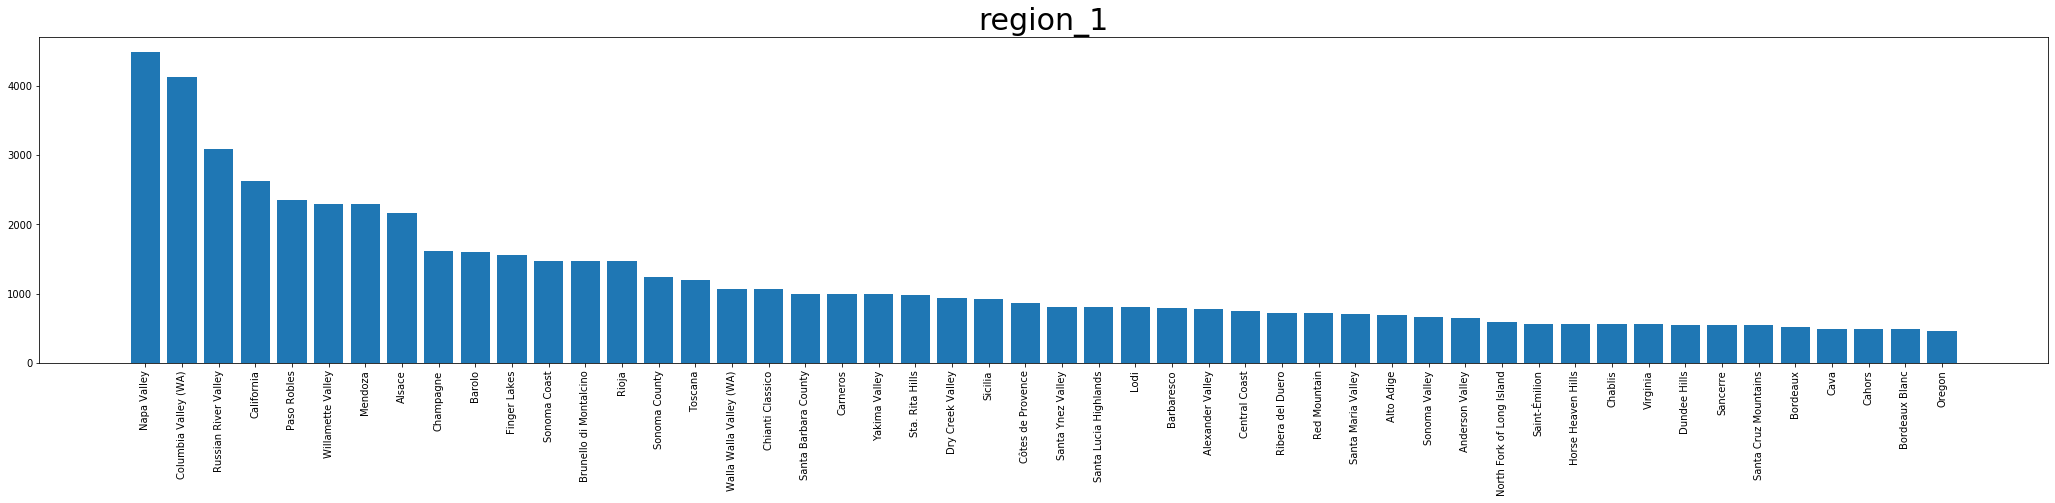

Top 5 frequency of region_2:
Central Coast (28.79%) | Sonoma (23.49%) | Columbia Valley (21.08%) | Napa (17.73%) | Willamette Valley (8.91%) | 


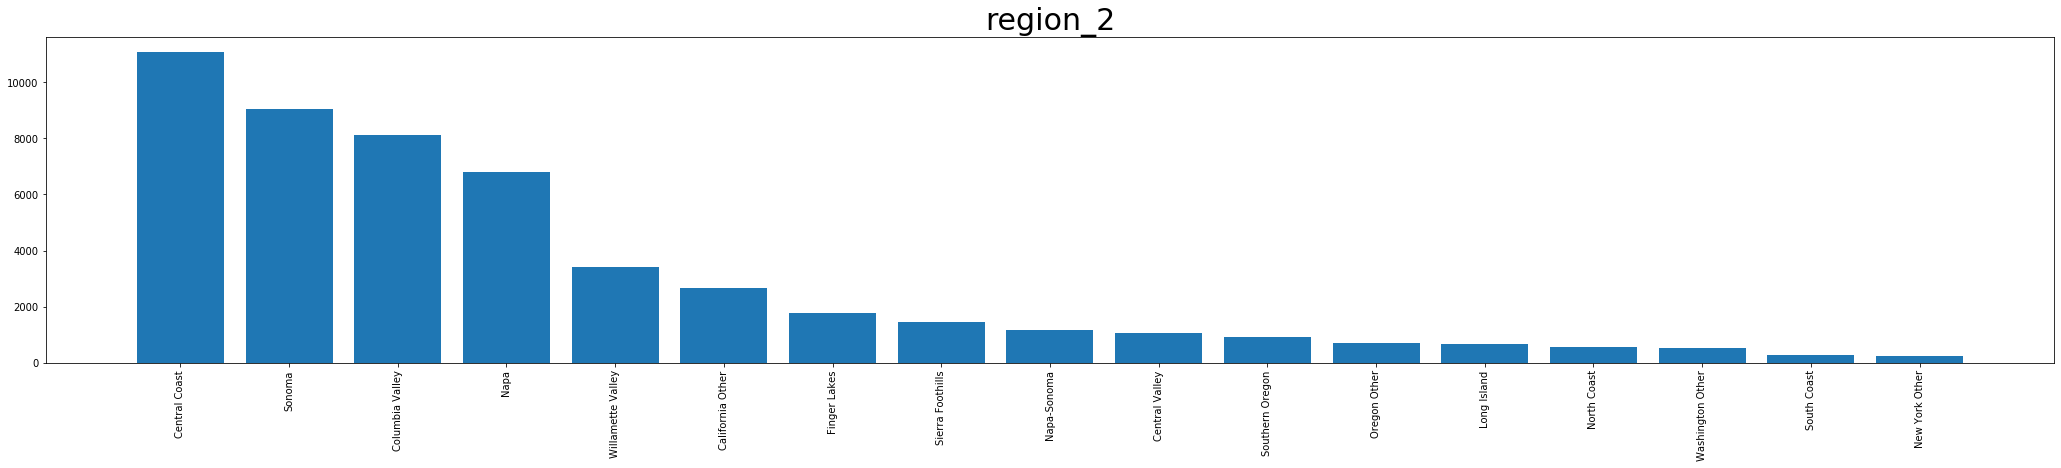

Top 5 frequency of taster_name:
Roger Voss (36.19%) | Michael Schachner (21.47%) | Kerin O’Keefe (15.29%) | Virginie Boone (13.53%) | Paul Gregutt (13.52%) | 


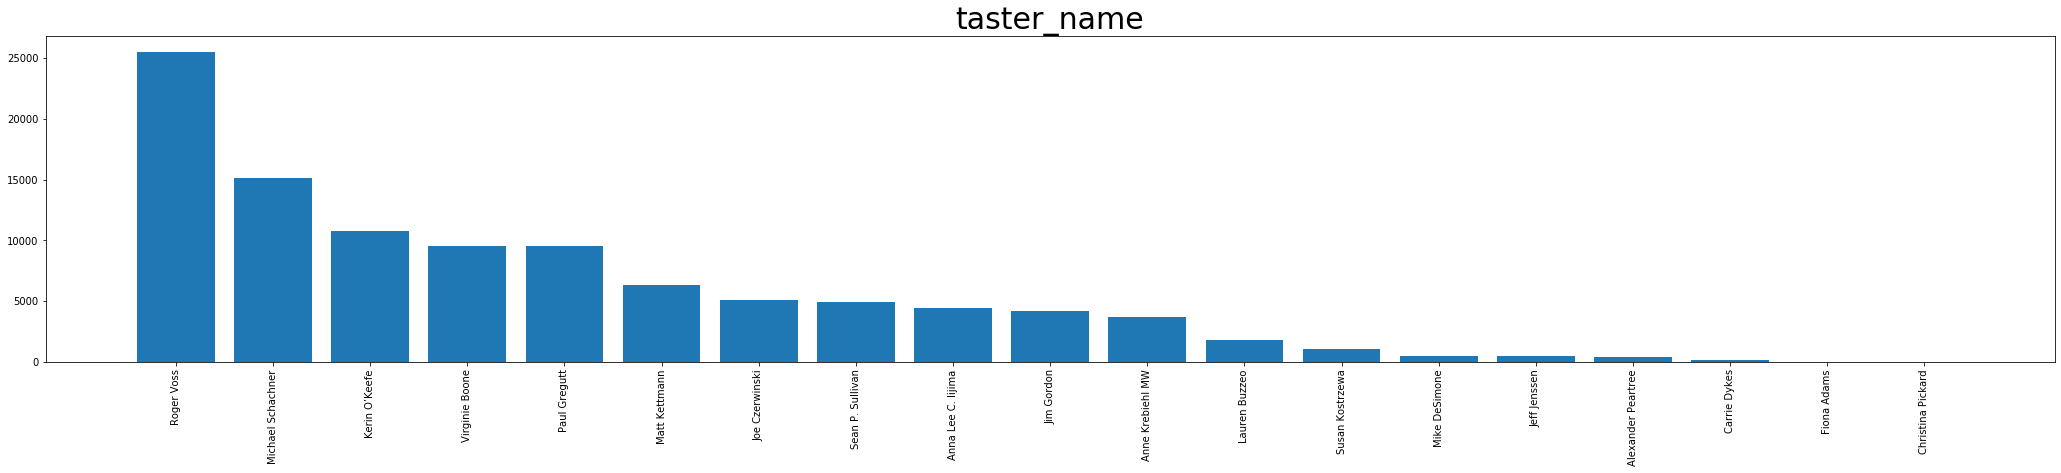

Top 5 frequency of taster_twitter_handle:
@vossroger (36.19%) | @wineschach (21.47%) | @kerinokeefe (15.29%) | @vboone (13.53%) | @paulgwine  (13.52%) | 


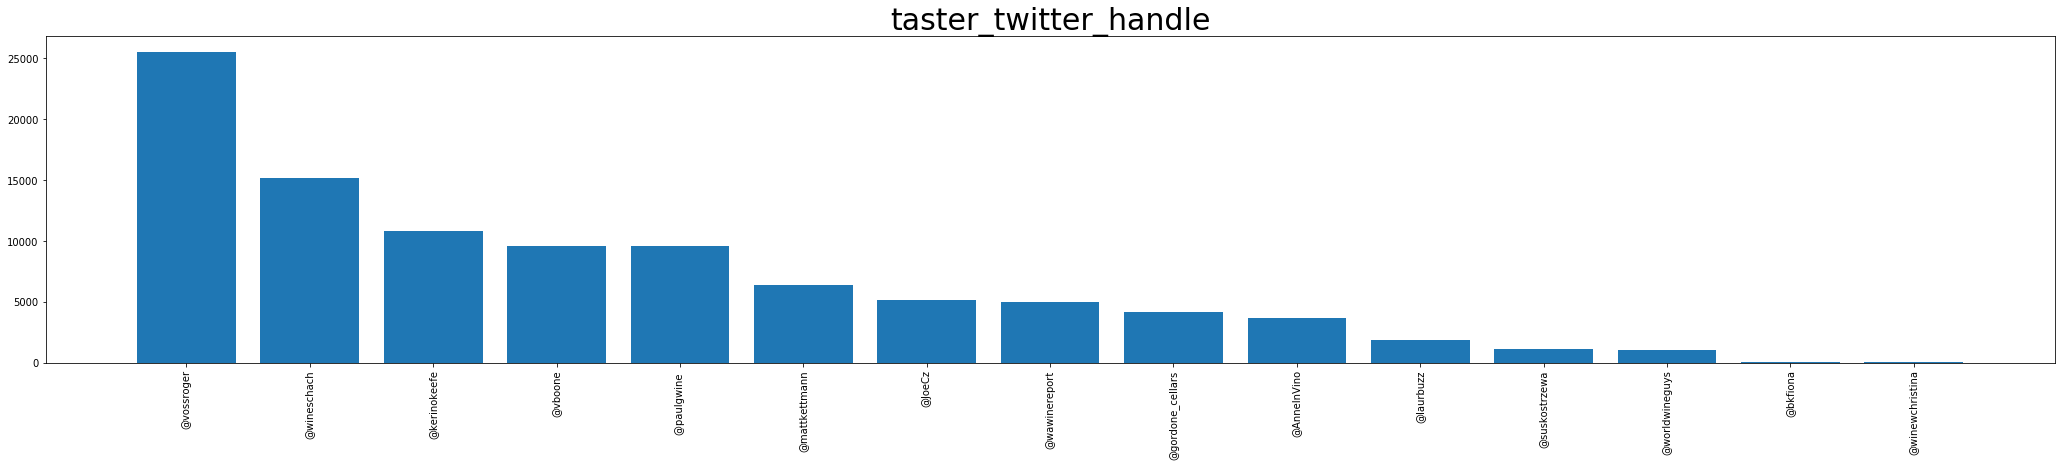

Top 5 frequency of title:
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County) (26.19%) | Korbel NV Brut Sparkling (California) (21.43%) | Segura Viudas NV Extra Dry Sparkling (Cava) (19.05%) | Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros) (16.67%) | Ruinart NV Brut Rosé  (Champagne) (16.67%) | 


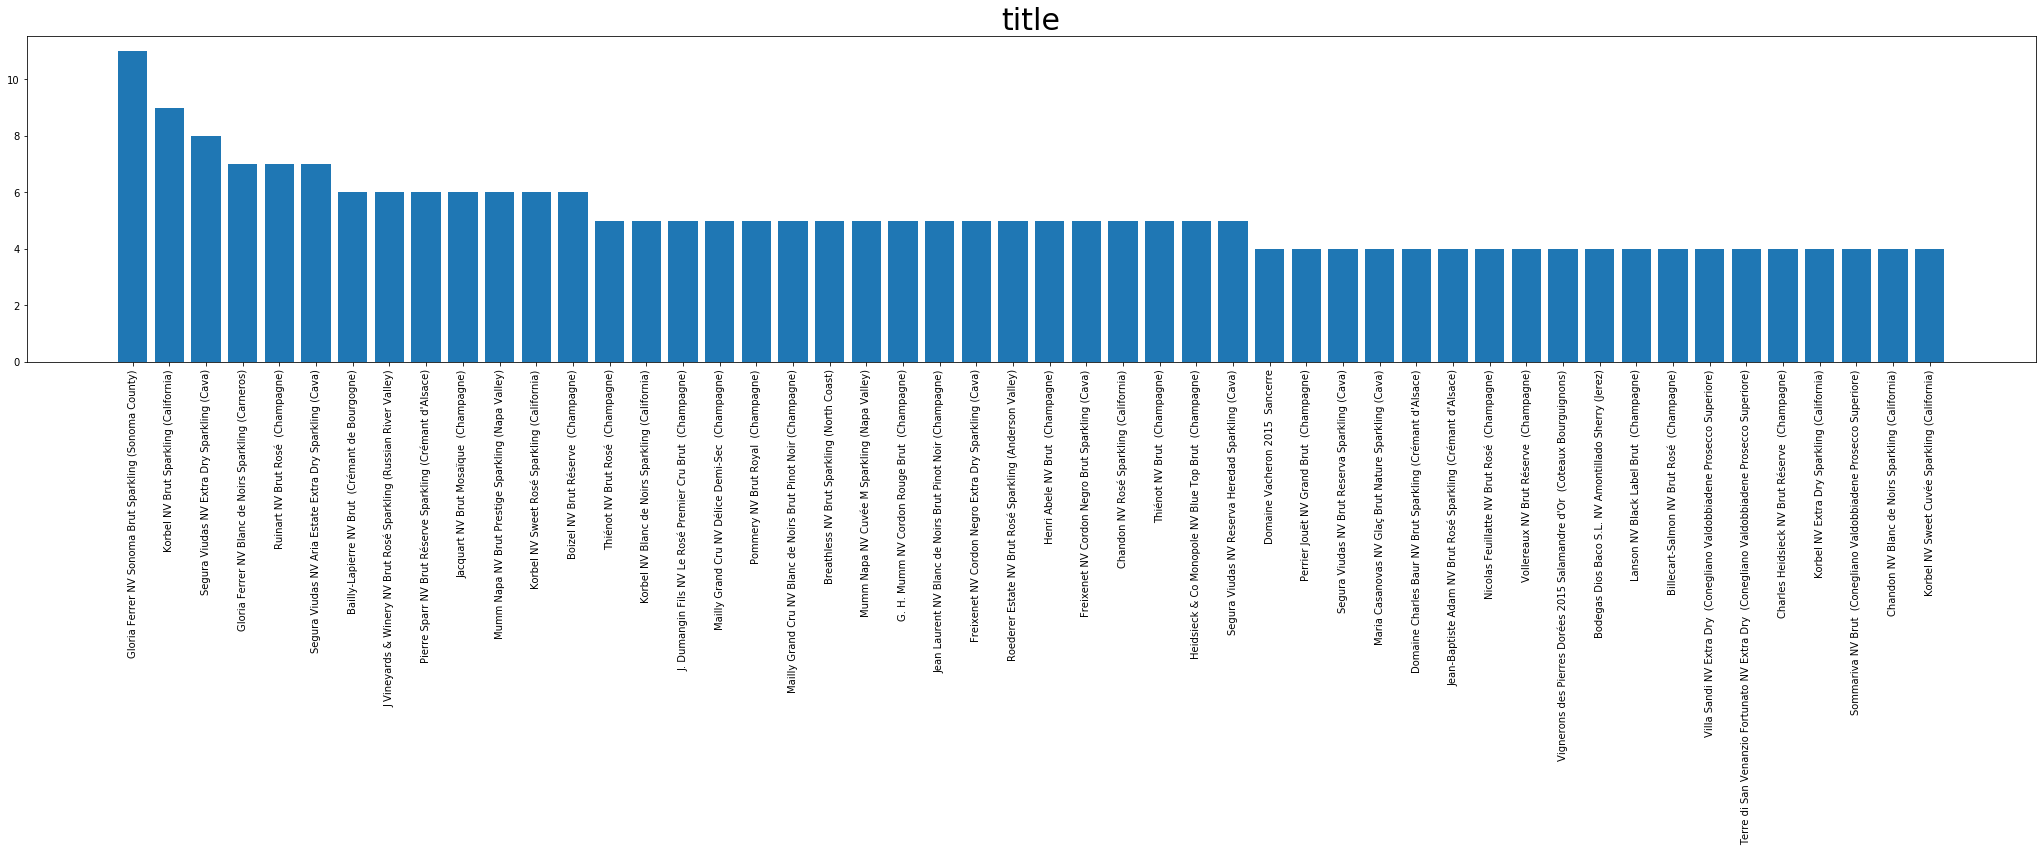

Top 5 frequency of variety:
Pinot Noir (26.36%) | Chardonnay (23.34%) | Cabernet Sauvignon (18.81%) | Red Blend (17.76%) | Bordeaux-style Red Blend (13.73%) | 


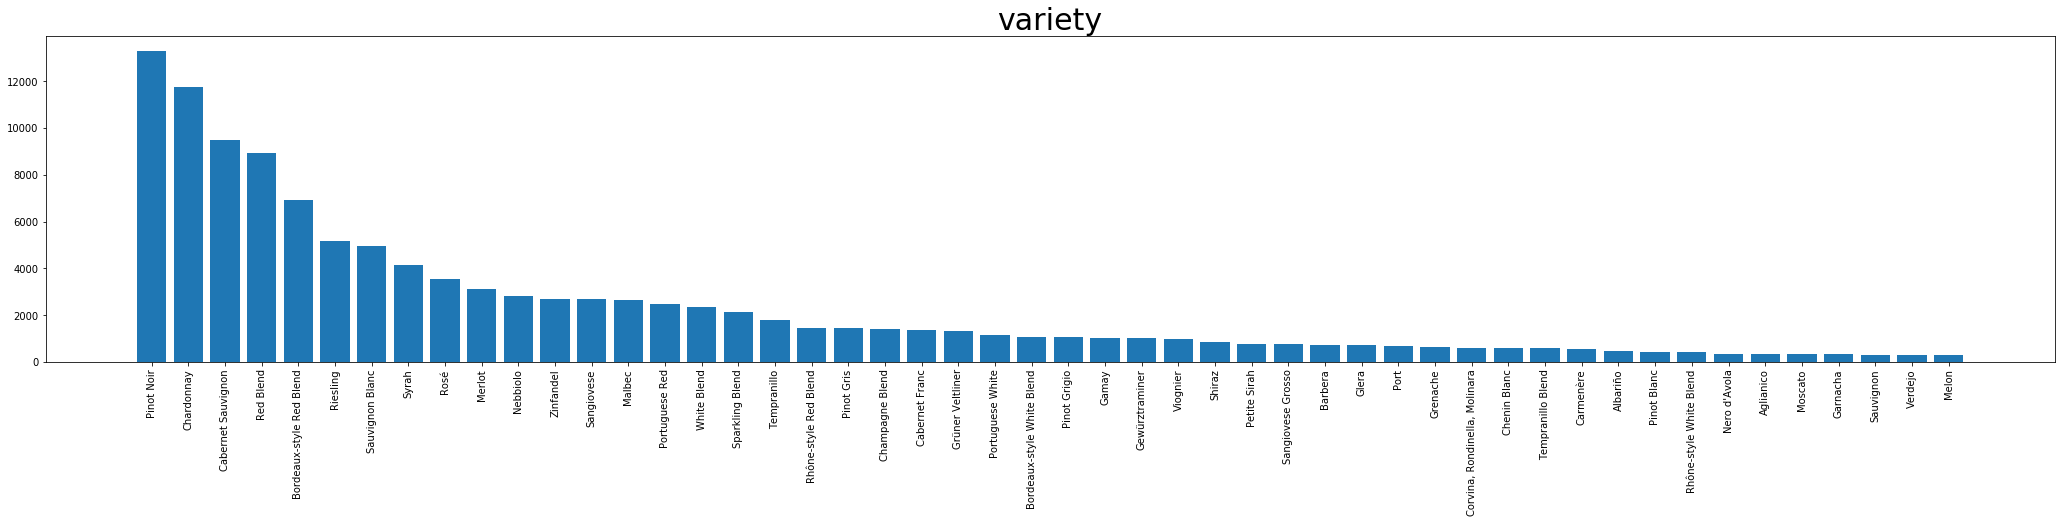

Top 5 frequency of winery:
Wines & Winemakers (20.85%) | Testarossa (20.47%) | DFJ Vinhos (20.19%) | Williams Selyem (19.81%) | Louis Latour (18.69%) | 


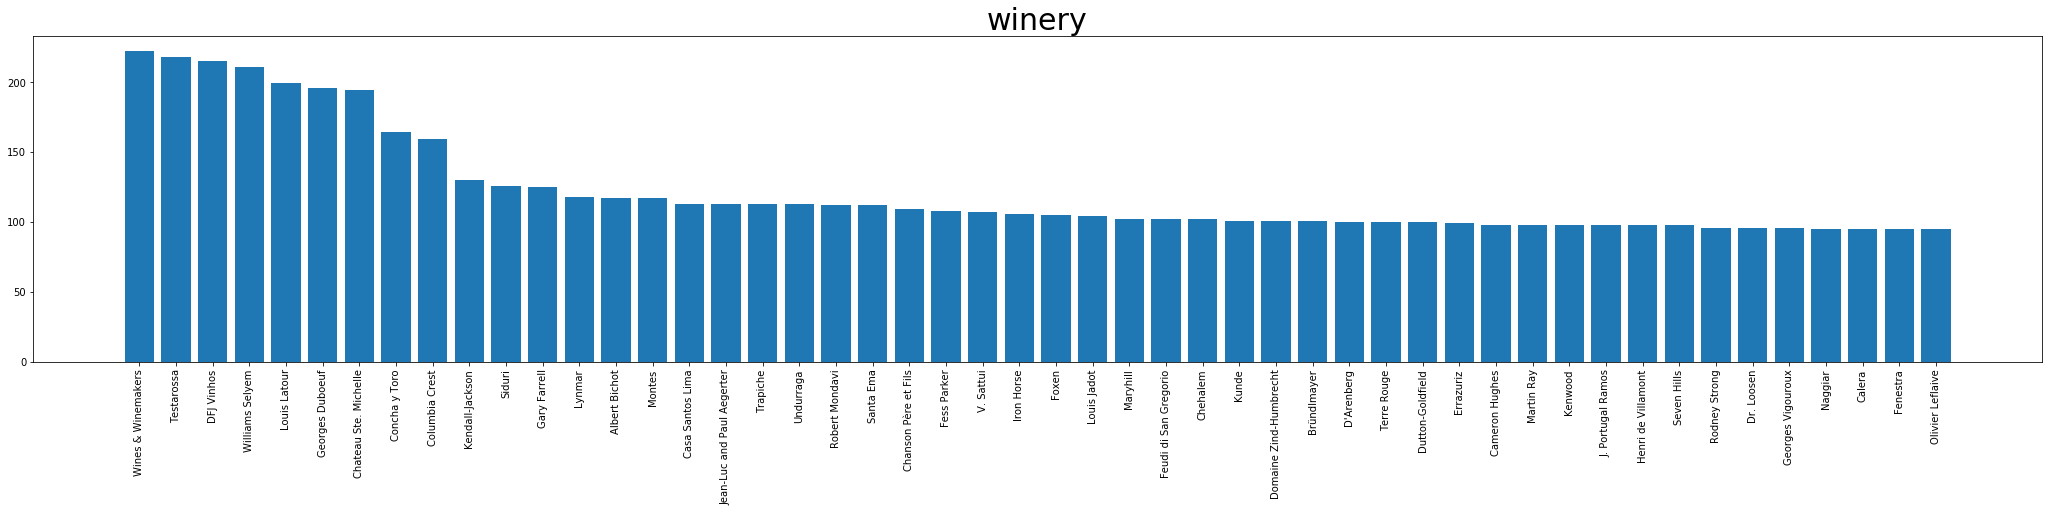

In [4]:
def bar_chart(nominal_data):
    x = nominal_data.index
    y = nominal_data.values
    
    print('Top 5 frequency of %s:'%nominal_data.name)
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print(s)
    
    plt.figure(figsize=(36,6))
    plt.title(nominal_data.name, fontsize=30)    
    plt.bar(x[:50], y[:50])
    plt.xticks(rotation=90)
    plt.show()

# bar chart for each nominal attribute
for i in nominal_index:
    bar_chart(data_frequency[i])

#### Numerical data summary
- Five-number summary:
    - Min 
    - Q1(25%) 
    - Q2(50%)
    - Q3(75%)
    - Max

In [5]:
def data_describe(data):
    """
    Generate descriptive statistics.

    Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
    """
    print('descriptive statistics (%s):' % data.name)
    info = data.describe()
    print('Min: ', info['min'], '\tQ1 (25%): ', info['25%'], '\tQ2 (50%): ', info['50%'], '\tQ3 (75%): ', info['75%'], '\tMax:', info['max'])
    print('Missing: %d'%(data_shape[0] - info['count']))
    print('-'*100)

# five-number summary for each attribute
for i in numerical_index:
    data_describe(data[i])

descriptive statistics (points):
Min:  80.0 	Q1 (25%):  86.0 	Q2 (50%):  88.0 	Q3 (75%):  91.0 	Max: 100.0
Missing: 0
----------------------------------------------------------------------------------------------------
descriptive statistics (price):
Min:  4.0 	Q1 (25%):  17.0 	Q2 (50%):  25.0 	Q3 (75%):  42.0 	Max: 3300.0
Missing: 8996
----------------------------------------------------------------------------------------------------


### 1.2 Data Visualization
#### Numerical data visualization
- histogram  
- box plot
- scatter matrix

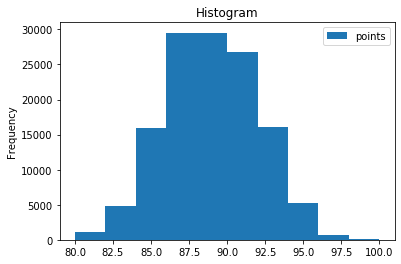

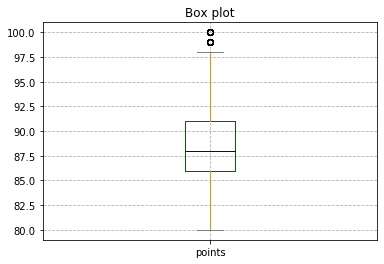

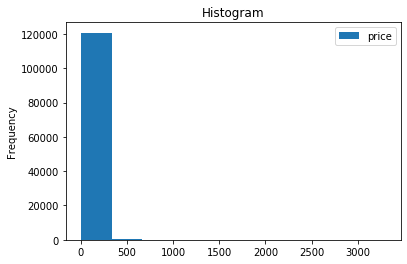

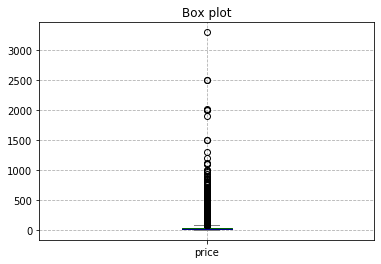

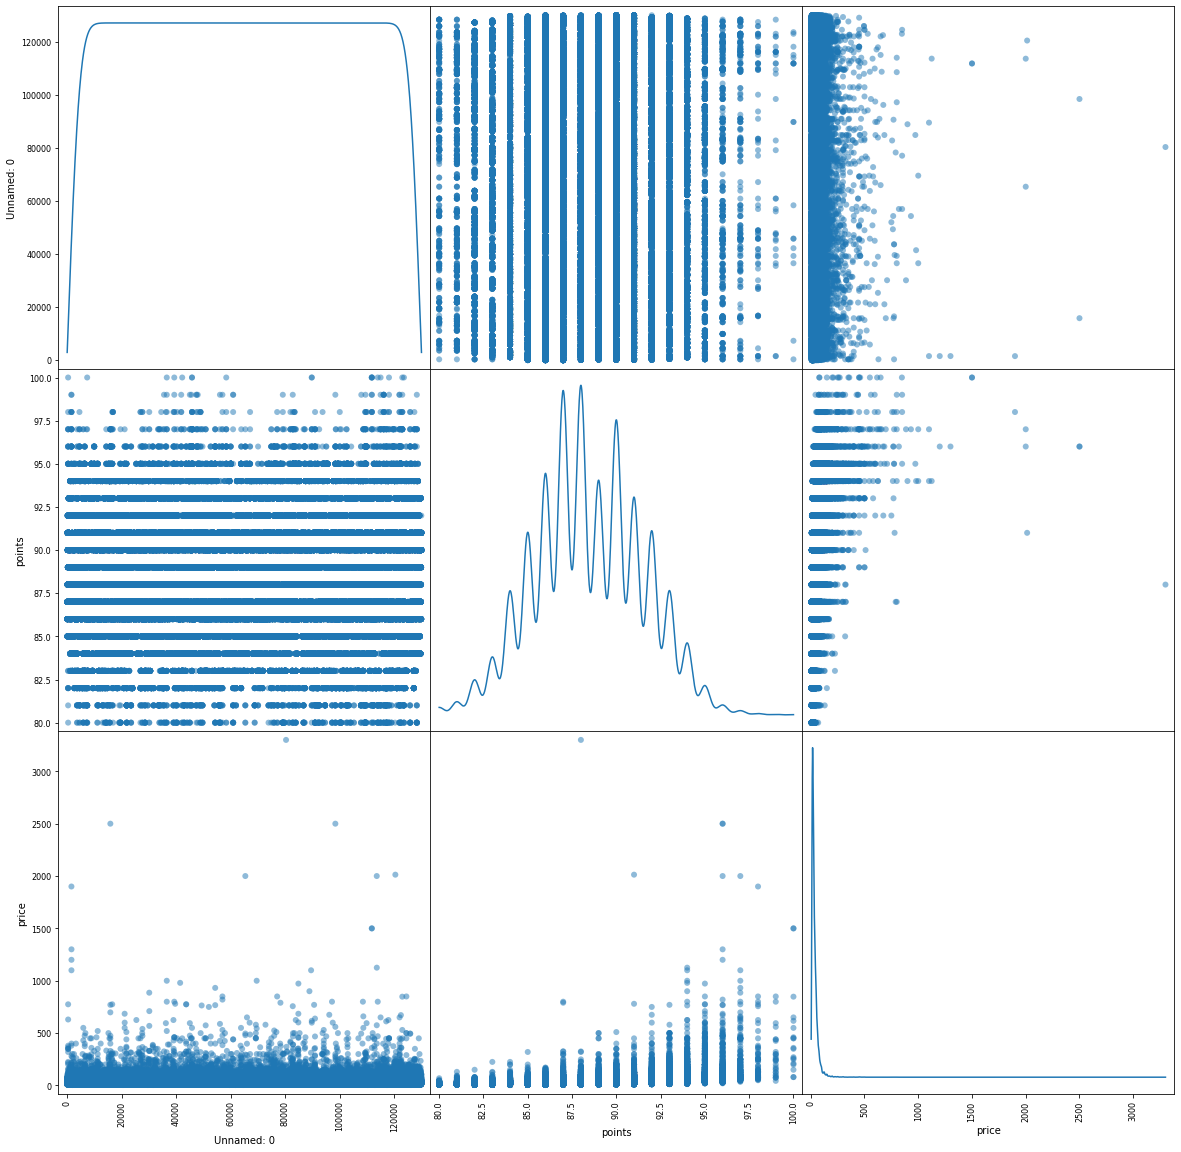

In [6]:
# histogram
def histogram(data):
    df = pd.DataFrame(data)
    df.plot.hist()
    plt.title('Histogram')
    plt.show()

# box plot
def box_plot(data):
    # boxes 箱线
    # whiskers 分为数于error bar横线之间的竖线的颜色
    # medians 中位线的颜色
    # caps error bar 横线的颜色
    color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
    data.plot.box(grid=True, color=color)   # color 样式填充
    plt.grid(linestyle='--')
    plt.title('Box plot')
    plt.show()

def box_plot1(data):
    df = pd.DataFrame(data)
    df.boxplot(sym = 'o',    #异常点形状
                   vert = True,          # 是否垂直
                   whis=1.5,             # IQR
                   patch_artist = True,  # 上下四分位框是否填充
                   meanline = False,showmeans = True,  # 是否有均值线及其形状
                   showbox = True,   # 是否显示箱线
                   showfliers = True,  #是否显示异常值
                   notch = False,    # 中间箱体是否缺口
                   return_type='dict')  # 返回类型为字典
    plt.grid(linestyle='--')
    plt.title('Box plot')
    plt.show()

# scatter plot
def scatter_plot(data1, index1, index2):
    data.plot.scatter(x=index1,
                   y=index2,
                   c='DarkBlue')
    plt.title('Scatter plot')
    plt.show()

for i in numerical_index:
    histogram(data[i])
    box_plot(data[i])

# scatter matrix
# The diagonal of the matrix is the KDE(Kernel Density Estimation) of each feature, and the color is the variety of wine
pd.plotting.scatter_matrix(data, marker='o', figsize=(20, 20), diagonal='kde')
plt.show()

## 2. Processing of missing data

### 2.1 Remove missing values

In [7]:
# Remove missing values
data_remove = data.dropna()
data_remove.info()

# Get frequency of each arrtibute (after remove missing values)
data_remove_frequency = {key: data_remove[key].value_counts() for key in data_remove.columns}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22387 entries, 4 to 129950
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22387 non-null  int64  
 1   country                22387 non-null  object 
 2   description            22387 non-null  object 
 3   designation            22387 non-null  object 
 4   points                 22387 non-null  int64  
 5   price                  22387 non-null  float64
 6   province               22387 non-null  object 
 7   region_1               22387 non-null  object 
 8   region_2               22387 non-null  object 
 9   taster_name            22387 non-null  object 
 10  taster_twitter_handle  22387 non-null  object 
 11  title                  22387 non-null  object 
 12  variety                22387 non-null  object 
 13  winery                 22387 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.6

#### compare with raw data
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [8]:
def compare_top5_frequency(nominal_data, nominal_data1):
    x = nominal_data.index
    y = nominal_data.values
    
    print('Top 5 frequency of %s (raw data):' % nominal_data.name)
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print(s)
    
    x = nominal_data1.index
    y = nominal_data1.values
    print('\033[95mTop 5 frequency of %s (after remove missing values):' % nominal_data1.name + '\033[0m')
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print('\033[95m' + s + '\033[0m')
    print('-'*100)

# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], data_remove_frequency[i])

Top 5 frequency of country (raw data):
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
Top 5 frequency of country (after remove missing values):
US (100.00%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
Top 5 frequency of designation (after remove missing values):
Estate (37.03%) | Reserve (34.28%) | Estate Grown (16.93%) | Rosé of (6.18%) | Old Vine (5.58%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (58.37%) | Washington (13.91%) | Bordeaux (9.57%) | Tuscany (9.50%) | Oregon (8.65%) | 
Top 5 frequency of province (after remove missing values):
California (57.62%) | Washington (26.11%) | Oregon (15.58%) | New York (0.68%) | 
----------------

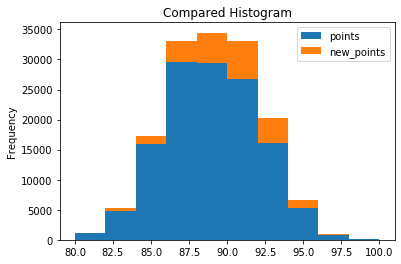

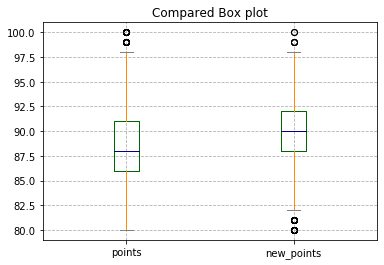

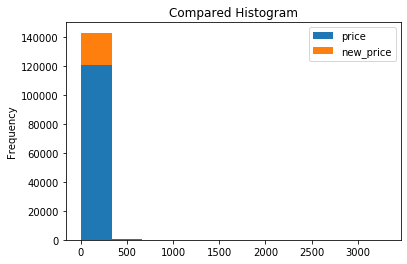

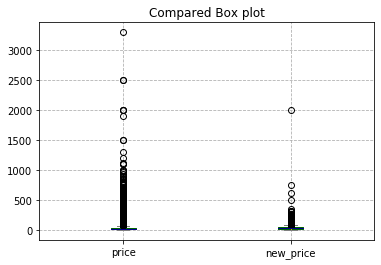

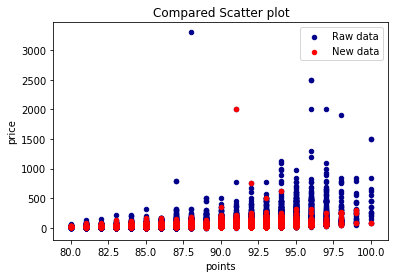

In [9]:
# Compared Histogram
def histogram_compare(raw_data, new_data):
    new_name = ['new_' + new_data.name]
    raw_data = pd.DataFrame(raw_data)
    new_data = pd.DataFrame(new_data)
    new_data.columns=new_name
    df = raw_data.append(new_data)
    df.plot.hist(stacked=True)
    plt.title('Compared Histogram')
    plt.show()

# Compared Box plot
def box_plot_compare(raw_data, new_data):
    # boxes 箱线
    # whiskers 分为数于error bar横线之间的竖线的颜色
    # medians 中位线的颜色
    # caps error bar 横线的颜色
    new_name = ['new_' + new_data.name]
    raw_data = pd.DataFrame(raw_data)
    new_data = pd.DataFrame(new_data)
    new_data.columns=new_name
    df = raw_data.append(new_data)
    color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
    df.plot.box(grid=True, color=color)   # color 样式填充
    plt.grid(linestyle='--')
    plt.title('Compared Box plot')
    plt.show()

# Compared Scatter plot
def scatter_plot_compare(data1, data2, index1, index2):
    ax = data1.plot.scatter(x=index1, y=index2, c='DarkBlue', label='Raw data')
    data2.plot.scatter(x=index1, y=index2, c='r', label='New data', ax=ax)
    plt.title('Compared Scatter plot')
    plt.show()
    
for i in numerical_index:
    histogram_compare(data[i], data_remove[i])
    box_plot_compare(data[i], data_remove[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, data_remove, 'points', 'price')

Free the memory

In [10]:
del data_remove,data_remove_frequency

###  2.2 Fill NA/NaN values using the highest frequency value

In [11]:
# Fill NA/NaN values using the highest frequency value.
data_highest = data.fillna(value=data_frequency)
data_highest.info()

# Get frequency of each arrtibute (after fill NaN vaues using the higest frequency value)
data_highest_frequency = {key: data_highest[key].value_counts() for key in data_highest.columns}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  121001 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


#### compare with raw data
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [12]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], data_highest_frequency[i])

Top 5 frequency of country (raw data):
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
Top 5 frequency of country (after remove missing values):
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (58.37%) | Washington (13.91%) | Bordeaux (9.57%) | Tuscany (9.50%) | Oregon (8.65%) | 
Top 5 frequency of province (after remove missing values):
California (58.37%) | Washin

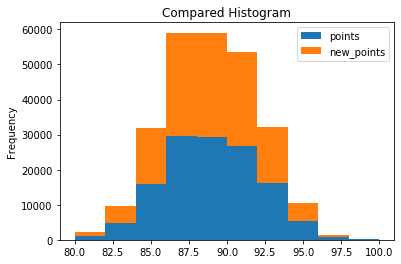

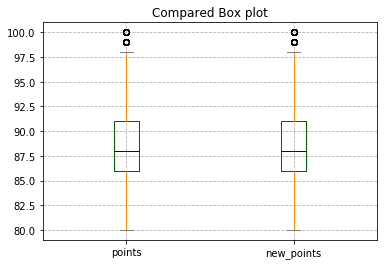

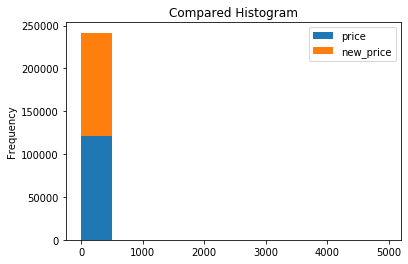

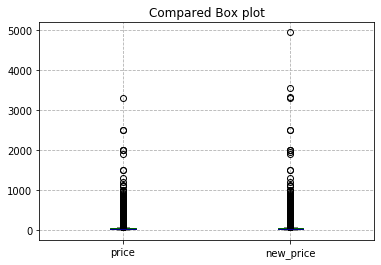

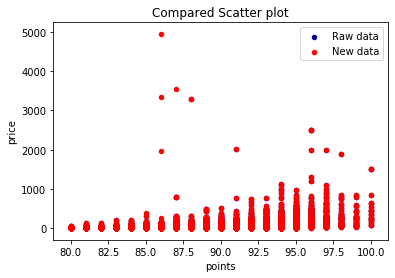

In [13]:
for i in numerical_index:
    histogram_compare(data[i], data_highest[i])
    box_plot_compare(data[i], data_highest[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, data_highest, 'points', 'price')

##### Free the memory

In [14]:
del data_highest,data_highest_frequency

##### Descriptors of the raw datase

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


###  2.3 Fill in missing values by the correlation of the attribute
#### Random Forest Regressor
Missing attributes: variety(1) | country (63) | province (63) | region_1 (21,247) | region_2 (79,460) | price(8,996) | designation (37,465) | taster_name (26,244) | taster_twitter_handle (31,213)

I follow the above order to fill in missing values step by step.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
def set_missing_values(df, complete_index):
    
    enc_label = OrdinalEncoder()
    enc_fea = OrdinalEncoder()
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
    # y is the know missing_index
    y = known_values[:, 0].reshape(-1, 1)
    enc_label.fit(y)
#     print(enc_label.categories_)
    y = enc_label.transform(y)
    
    # X are the features
    X = known_values[:, 1:]
    test_X = unknow_values[:, 1:]
    all_X = np.row_stack((X,test_X))
#     print(X.shape, test_X.shape, all_X.shape)
    enc_fea.fit(all_X)
#     print(enc_fea.categories_)
    X = enc_fea.transform(X)
    
    # fit
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y.ravel())
    # predict
    predicted_values = rfr.predict(enc_fea.transform(unknow_values[:, 1:]))
    predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
    print('fill in values of %s:'%missing_index, predicted_values)
     # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values

Fill in missing values of '**variety**' using complete attribute data ('description' & 'title' & 'winery')

In [17]:
new_data = data.copy()
set_missing_values(new_data, ['variety','description', 'title', 'winery'])
new_data.info()

fill in values of variety: [['Malbec-Cabernet Sauvignon']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129971 non-null  object 
 13  winery                 129971 

Fill in missing values of '**country**' using complete attribute data ('description' & 'title' & 'variety' & 'winery')

In [18]:
set_missing_values(new_data, ['country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of country: [['Mexico']
 ['Serbia']
 ['Morocco']
 ['Israel']
 ['Israel']
 ['Israel']
 ['Macedonia']
 ['Israel']
 ['Ukraine']
 ['Slovenia']
 ['Greece']
 ['Canada']
 ['Italy']
 ['China']
 ['Portugal']
 ['Portugal']
 ['Austria']
 ['South Africa']
 ['Bulgaria']
 ['New Zealand']
 ['Spain']
 ['England']
 ['Cyprus']
 ['India']
 ['Peru']
 ['Romania']
 ['Lebanon']
 ['Morocco']
 ['Portugal']
 ['Serbia']
 ['Bulgaria']
 ['Peru']
 ['Portugal']
 ['England']
 ['Hungary']
 ['Portugal']
 ['Portugal']
 ['Morocco']
 ['Greece']
 ['Lebanon']
 ['Israel']
 ['France']
 ['Germany']
 ['Hungary']
 ['England']
 ['Austria']
 ['India']
 ['Lebanon']
 ['Morocco']
 ['Austria']
 ['Portugal']
 ['Portugal']
 ['Lebanon']
 ['Austria']
 ['Portugal']
 ['Moldova']
 ['Peru']
 ['Spain']
 ['Mexico']
 ['Morocco']
 ['Spain']
 ['Serbia']
 ['Turkey']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  

Fill in missing values of '**province**' using complete attribute data ('country' & 'description' & 'title' & 'variety' & 'winery')

In [19]:
set_missing_values(new_data, ['province','country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of province: [['Tikves']
 ['Lemesos']
 ['Piedmont']
 ['Istria']
 ['Limarí Valley']
 ['Jonkershoek Valley']
 ['Recas']
 ['Jonkershoek Valley']
 ['Georgia']
 ['Krk']
 ['Mátra']
 ['Hawaii']
 ['Lisboa']
 ['Lemesos']
 ['Kamptal']
 ['Lombardy']
 ['South Island']
 ['Mátra']
 ['Spanish Islands']
 ['Lisboa']
 ['New Mexico']
 ['Krania Olympus']
 ['Leithaberg']
 ['Ribatejano']
 ['Kutjevo']
 ['Kremstal']
 ['Colchagua Valley']
 ['Rio Claro']
 ['Moscatel de Setúbal']
 ['Krania Olympus']
 ['Maipo Valley']
 ['Monemvasia']
 ['Germany']
 ['Hungary']
 ['Primorska']
 ['East Coast']
 ['Lombardy']
 ['New Zealand']
 ['Malleco']
 ['New Jersey']
 ['Mostar']
 ['Itata Valley']
 ['North Dalmatia']
 ['Port']
 ['Kumeu']
 ['Morocco']
 ['Port']
 ['Connecticut']
 ['Minho']
 ['Ribatejo']
 ['South Africa']
 ['Kamptal']
 ['Retsina']
 ['Ribatejo']
 ['Germany']
 ['Peljesac']
 ['Letrinon']
 ['Durbanville']
 ['Thraki']
 ['Pitsilia Mountains']
 ['Niederösterreich']
 ['Paarl']
 ['Devon Valley']]
<class 'pandas.c

Fill in missing values of '**region_1**' using complete attribute data ('province' & 'country' & 'description' & 'title' & 'variety' & 'winery')

In [20]:
set_missing_values(new_data, ['region_1', 'province','country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of region_1: [['Mâcon-Péronne']
 ['Dolcetto di Monferrato']
 ['Côtes de Provence Sainte-Victoire']
 ...
 ['Finger Lakes']
 ['Pouilly-Loché']
 ['Coteaux du Vendômois']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title       

Fill in missing values of '**region_2**' using complete attribute data ('region_1' & 'province' & 'country' & 'description' & 'title' & 'variety' & 'winery')

In [21]:
set_missing_values(new_data, ['region_2', 'region_1', 'province','country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of region_2: [['Washington Other']
 ['Napa']
 ['Finger Lakes']
 ...
 ['Central Valley']
 ['Central Valley']
 ['Central Valley']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12

Fill in missing values of '**price**' using complete attribute data ('region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title' & 'variety' & 'winery')

In [22]:
set_missing_values(new_data, ['price', 'region_2', 'region_1', 'province','country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of price: [[24.0]
 [40.0]
 [14.0]
 ...
 [31.0]
 [18.0]
 [24.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129971 non-null  object 
 13  winery    

Fill in missing values of '**designation**' using complete attribute data ('price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title',  'variety' & 'winery')

In [23]:
set_missing_values(new_data, ['designation', 'price', 'region_2', 'region_1', 'province','country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of designation: [['Late Harvest Semillon Ice Wine']
 ['Neipperger Schlossberg']
 ['Leithaberg Weiss']
 ...
 ['Kirschgarten']
 ['La Conviviance']
 ['Les Villages de Jaffelin']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  titl

Fill in missing values of '**taster_name**' using complete attribute data ('designation' & 'price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title',  'variety' & 'winery')

In [24]:
set_missing_values(new_data, ['taster_name', 'designation', 'price', 'region_2', 'region_1', 'province','country','description', 'title', 'variety', 'winery'])
new_data.info()

fill in values of taster_name: [['Kerin O’Keefe']
 ['Kerin O’Keefe']
 ['Susan Kostrzewa']
 ...
 ['Matt Kettmann']
 ['Kerin O’Keefe']
 ['Jim Gordon']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            129971 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  objec

Fill in missing values of '**taster_twitter_handle**' using complete attribute data ('taster_name' & 'designation' & 'price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title',  'variety' & 'winery')

In [25]:
set_missing_values(new_data, ['taster_twitter_handle', 'taster_name', 'designation', 'price', 'region_2', 'region_1', 'province','country','description', 'title', 'variety', 'winery'])
new_data.info()

# Get frequency of each arrtibute (after fill in missing values by the correlation of the attribute)
new_data_frequency = {key: new_data[key].value_counts() for key in new_data.columns}

fill in values of taster_twitter_handle: [['@wineschach']
 ['@AnneInVino']
 ['@AnneInVino']
 ...
 ['@gordone_cellars']
 ['@AnneInVino']
 ['@AnneInVino']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            129971 non-null  object 
 10  taster_twitter_handle  129971 non-null  object 
 11  title                  129971 non-null  o

#### compare with raw data
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [26]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], new_data_frequency[i])

Top 5 frequency of country (raw data):
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
Top 5 frequency of country (after remove missing values):
US (50.24%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (58.37%) | Washington (13.91%) | Bordeaux (9.57%) | Tuscany (9.50%) | Oregon (8.65%) | 
Top 5 frequency of province (after remove missing values):
California (58.37%) | Washin

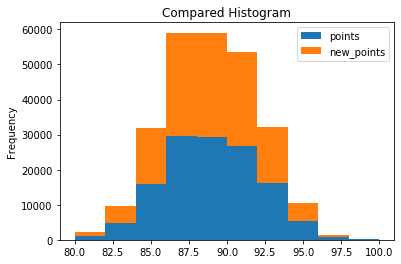

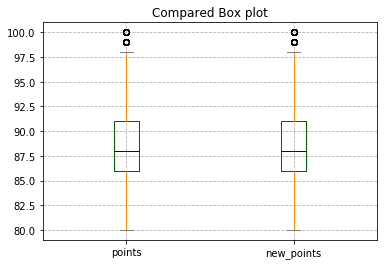

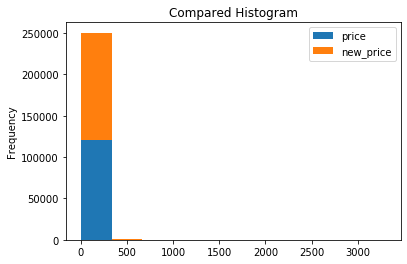

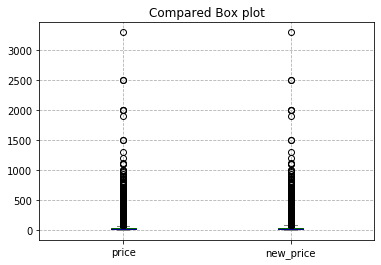

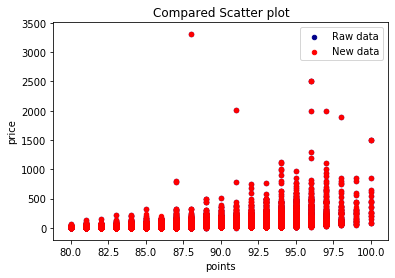

In [27]:
for i in numerical_index:
    histogram_compare(data[i], new_data[i])
    box_plot_compare(data[i], new_data[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, new_data, 'points', 'price')

##### Free the memory

In [28]:
del new_data, new_data_frequency

##### Descriptors of the raw datase

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### 2.4 Fill in missing values by similarity between data objects
#### Cosine similarity & Euclidean distance
Missing attributes: variety(1) | country (63) | province (63) | region_1 (21,247) | region_2 (79,460) | price(8,996) | designation (37,465) | taster_name (26,244) | taster_twitter_handle (31,213)

Similarly, I follow the above order to fill in missing values step by step.

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
def set_missing_values_similarity(df, complete_index, metric='cosine'):
    
    enc_label = OrdinalEncoder()
    enc_fea = OrdinalEncoder()
    
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
    # y is the know missing_index
    y = known_values[:, 0].reshape(-1, 1)
    enc_label.fit(y)
    y = enc_label.transform(y)
    
    # X are the features
    X = known_values[:, 1:]
    
    test_X = unknow_values[:, 1:]
    all_X = np.row_stack((X,test_X))
    enc_fea.fit(all_X)
    X = enc_fea.transform(X)
    test_X = enc_fea.transform(test_X)
    
    
    if metric == 'cosine':
        # fit
        dist = cosine_similarity(test_X, X)
        # predict
        most_similar_index = dist.argmax(axis=1)
    elif metric == 'euclidean':
         # fit
        dist = cdist(test_X,X,metric='euclidean')
        # predict
        most_similar_index = dist.argmin(axis=1)
    
    predicted_values = y[most_similar_index]
    predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
    print('fill in values of %s:'%missing_index, predicted_values)
     # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values 

Fill in missing values of '**variety**' using complete attribute data ('description' & 'title' & 'winery')

In [31]:
cos_data = data.copy()
set_missing_values_similarity(cos_data, ['variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

euclidean_data = data.copy()
set_missing_values_similarity(euclidean_data, ['variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of variety: [['Champagne Blend']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129971 non-null  object 
 13  winery                 129971 non-null  

Fill in missing values of '**country**' using complete attribute data ('description' & 'title' & 'variety' & 'winery')

In [32]:
set_missing_values_similarity(cos_data, ['country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of country: [['US']
 ['Portugal']
 ['US']
 ['US']
 ['Italy']
 ['US']
 ['US']
 ['US']
 ['Chile']
 ['South Africa']
 ['Chile']
 ['Argentina']
 ['US']
 ['US']
 ['Portugal']
 ['US']
 ['Austria']
 ['US']
 ['US']
 ['South Africa']
 ['Italy']
 ['US']
 ['US']
 ['US']
 ['Italy']
 ['Chile']
 ['US']
 ['US']
 ['US']
 ['South Africa']
 ['Austria']
 ['Italy']
 ['Austria']
 ['South Africa']
 ['US']
 ['Macedonia']
 ['US']
 ['Spain']
 ['US']
 ['US']
 ['Spain']
 ['Portugal']
 ['Israel']
 ['Italy']
 ['South Africa']
 ['US']
 ['Portugal']
 ['US']
 ['US']
 ['US']
 ['Italy']
 ['Portugal']
 ['US']
 ['US']
 ['Austria']
 ['US']
 ['Chile']
 ['US']
 ['Italy']
 ['Chile']
 ['Spain']
 ['Italy']
 ['Spain']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                1

Fill in missing values of '**province**' using complete attribute data ('country' & 'description' & 'title' & 'variety' & 'winery')

In [33]:
set_missing_values_similarity(cos_data, ['province','country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of province: [['California']
 ['Douro']
 ['California']
 ['California']
 ['Piedmont']
 ['Washington']
 ['California']
 ['California']
 ['Rapel Valley']
 ['Hemel en Aarde']
 ['Maipo Valley']
 ['Other']
 ['Virginia']
 ['California']
 ['Port']
 ['Washington']
 ['Niederösterreich']
 ['California']
 ['Washington']
 ['Paardeberg']
 ['Tuscany']
 ['California']
 ['California']
 ['California']
 ['Tuscany']
 ['Casablanca Valley']
 ['California']
 ['Washington']
 ['California']
 ['Hemel en Aarde']
 ['Carnuntum']
 ['Tuscany']
 ['Burgenland']
 ['Stellenbosch']
 ['California']
 ['Tikves']
 ['Washington']
 ['Northern Spain']
 ['Oregon']
 ['California']
 ['Levante']
 ['Douro']
 ['Galilee']
 ['Veneto']
 ['Western Cape']
 ['California']
 ['Dão']
 ['New York']
 ['Oregon']
 ['California']
 ['Southern Italy']
 ['Port']
 ['California']
 ['California']
 ['Burgenland']
 ['Oregon']
 ['Maipo Valley']
 ['California']
 ['Southern Italy']
 ['Aconcagua Valley']
 ['Northern Spain']
 ['Tuscany']
 ['Nor

Fill in missing values of '**region_1**' using complete attribute data ('province' & 'country' & 'description' & 'title' & 'variety' & 'winery')

In [34]:
set_missing_values_similarity(cos_data, ['region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of region_1: [['Russian River Valley']
 ['Amarone della Valpolicella']
 ['Oregon']
 ...
 ['Russian River Valley']
 ['Chinon']
 ['Côtes du Rhône Villages']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  1

Fill in missing values of '**region_2**' using complete attribute data ('region_1' & 'province' & 'country' & 'description' & 'title' & 'variety' & 'winery')

In [35]:
set_missing_values_similarity(cos_data, ['region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of region_2: [['Columbia Valley']
 ['Sonoma']
 ['Finger Lakes']
 ...
 ['California Other']
 ['Central Coast']
 ['Central Coast']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 1

Fill in missing values of '**price**' using complete attribute data ('region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title' & 'variety' & 'winery')

In [36]:
set_missing_values_similarity(cos_data, ['price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['price', 'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of price: [[39.0]
 [13.0]
 [52.0]
 ...
 [25.0]
 [52.0]
 [45.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129971 non-null  object 
 13  winery    

Fill in missing values of '**designation**' using complete attribute data ('price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title',  'variety' & 'winery')

In [37]:
set_missing_values_similarity(cos_data, ['designation', 'price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['designation', 'price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of designation: [['Roserock Vineyard']
 ['Steingrubler Grand Cru']
 ['Comes a Time Alta Colina Vineyard']
 ...
 ['Fileno']
 ['Hermanos']
 ['Cuvée Albert']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  1

Fill in missing values of '**taster_name**' using complete attribute data ('designation' & 'price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title',  'variety' & 'winery')

In [38]:
set_missing_values_similarity(cos_data, ['taster_name', 'designation', 'price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()

set_missing_values_similarity(euclidean_data, ['taster_name', 'designation', 'price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()

fill in values of taster_name: [['Paul Gregutt']
 ['Lauren Buzzeo']
 ['Anna Lee C. Iijima']
 ...
 ['Joe Czerwinski']
 ['Michael Schachner']
 ['Roger Voss']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            129971 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null

Fill in missing values of '**taster_twitter_handle**' using complete attribute data ('taster_name' & 'designation' & 'price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'title',  'variety' & 'winery')

In [39]:
set_missing_values_similarity(cos_data, ['taster_twitter_handle', 'taster_name', 'designation', 'price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='cosine')
cos_data.info()
# Get frequency of each arrtibute (after fill in missing values by the correlation of the attribute)
cos_data_frequency = {key: cos_data[key].value_counts() for key in cos_data.columns}

set_missing_values_similarity(euclidean_data, ['taster_twitter_handle', 'taster_name', 'designation', 'price',  'region_2', 'region_1', 'province', 'country', 'variety','description', 'title', 'winery'], metric='euclidean')
euclidean_data.info()
# Get frequency of each arrtibute (after fill in missing values by the correlation of the attribute)
euclidean_data_frequency = {key: euclidean_data[key].value_counts() for key in euclidean_data.columns}

fill in values of taster_twitter_handle: [['@wineschach']
 ['@wineschach']
 ['@wineschach']
 ...
 ['@vossroger']
 ['@paulgwine\xa0']
 ['@paulgwine\xa0']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            129971 non-null  object 
 10  taster_twitter_handle  129971 non-null  object 
 11  title                  129971 non-null  o

#### compare with raw data (Cosine similarity)
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [40]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], cos_data_frequency[i])

Top 5 frequency of country (raw data):
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
Top 5 frequency of country (after remove missing values):
US (50.25%) | France (20.36%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (33.72%) | Estate (22.13%) | Reserva (20.99%) | Riserva (12.74%) | Estate Grown (10.42%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (58.37%) | Washington (13.91%) | Bordeaux (9.57%) | Tuscany (9.50%) | Oregon (8.65%) | 
Top 5 frequency of province (after remove missing values):
California (58.37%) | Washin

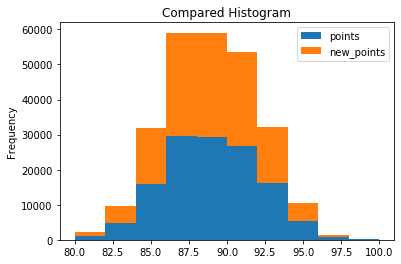

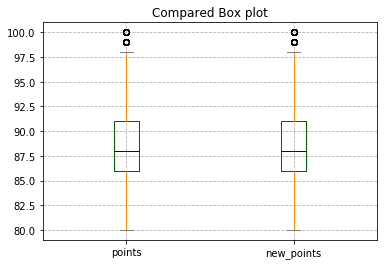

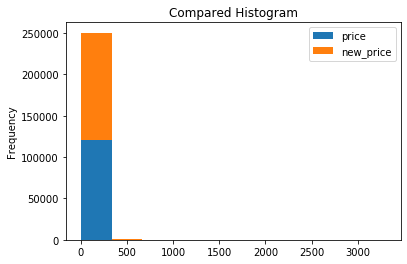

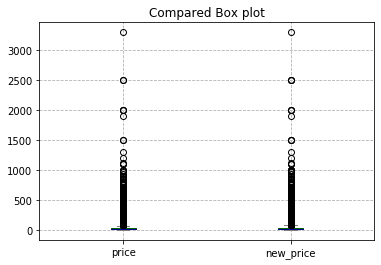

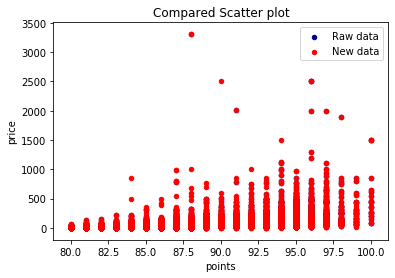

In [41]:
for i in numerical_index:
    histogram_compare(data[i], cos_data[i])
    box_plot_compare(data[i], cos_data[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, cos_data, 'points', 'price')

#### compare with raw data (Euclidean distance)
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [42]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], euclidean_data_frequency[i])

Top 5 frequency of country (raw data):
US (50.25%) | France (20.37%) | Italy (18.01%) | Spain (6.13%) | Portugal (5.25%) | 
Top 5 frequency of country (after remove missing values):
US (50.25%) | France (20.36%) | Italy (18.02%) | Spain (6.13%) | Portugal (5.24%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (34.00%) | Estate (22.37%) | Reserva (21.31%) | Riserva (11.81%) | Estate Grown (10.51%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (34.26%) | Estate (22.15%) | Reserva (20.78%) | Riserva (12.28%) | Estate Grown (10.53%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (58.37%) | Washington (13.91%) | Bordeaux (9.57%) | Tuscany (9.50%) | Oregon (8.65%) | 
Top 5 frequency of province (after remove missing values):
California (58.37%) | Washin

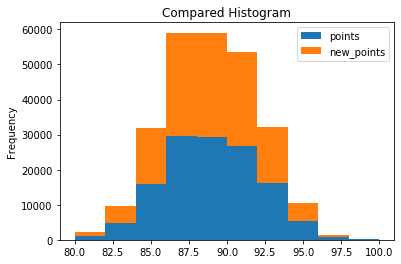

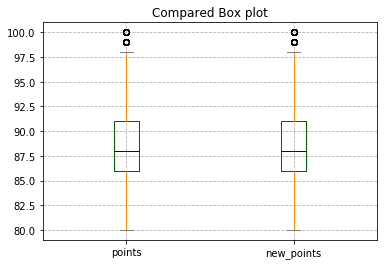

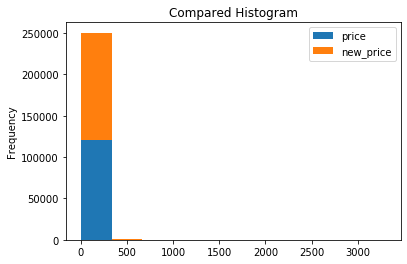

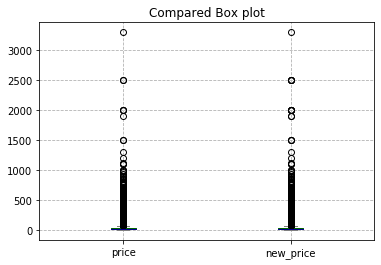

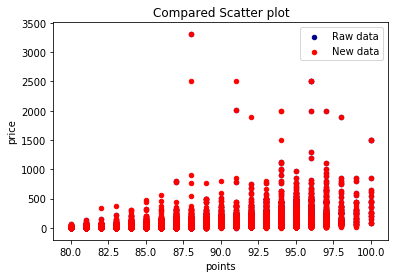

In [43]:
for i in numerical_index:
    histogram_compare(data[i], euclidean_data[i])
    box_plot_compare(data[i], euclidean_data[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, euclidean_data, 'points', 'price')

In [44]:
m, s = divmod(time.time()-timekeeping, 60)
h, m = divmod(m, 60)
print ('run time: %02d:%02d:%02d' % (h, m, s))

run time: 00:14:50
